# Importing Libraries


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [66]:
df = pd.read_csv("training.csv", encoding = 'ISO-8859-1')

In [3]:
df.shape

(1599999, 6)

# Giving name to columns

In [67]:
df.columns = ['target','id','date','flag','user','text']

# Dropping Unused Columns

In [68]:
df.drop(['id','flag','user'], axis = 1, inplace = True)

# Data Information

In [6]:
df.shape

(1599999, 3)

In [7]:
df.head()

,target,date,text
0,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,@Kwesidei not the whole crew


In [31]:
df.tail()

,target,date,text
1599994,4,Tue Jun 16 08:40:49 PDT 2009,Just woke up. Having no school is the best fee...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,Tue Jun 16 08:40:50 PDT 2009,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   date    1599999 non-null  object
 2   text    1599999 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


# Dropping null values

In [8]:
df.isnull().sum()

target    0
date      0
text      0
dtype: int64

There is not any null value in the dataset.

# Descriptive Analysis

In [10]:
df.describe()

,target
count,1.599999e+06
mean,2.000001e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,4.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [11]:
df.describe(include = 'object')

,date,text
count,1599999,1599999
unique,774362,1581465
top,Mon Jun 15 12:53:14 PDT 2009,isPlayer Has Died! Sorry
freq,20,210


# Drop Duplicate Values

In [69]:
df.duplicated().sum()

397

In [70]:
df = df.drop_duplicates()

In [71]:
df.duplicated().sum()

0

# EDA

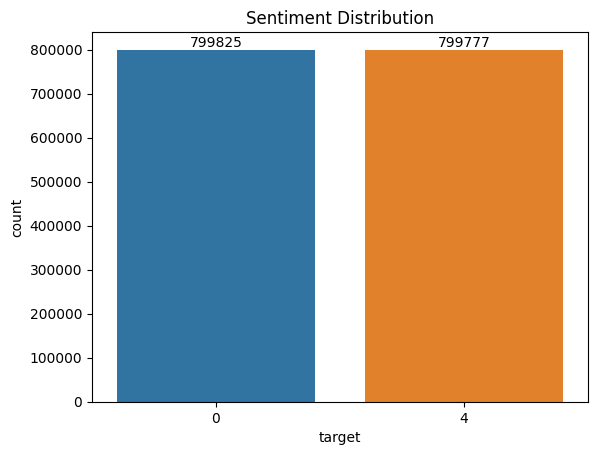

In [72]:
ax = sns.countplot(data = df, x = 'target')
plt.title('Sentiment Distribution')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


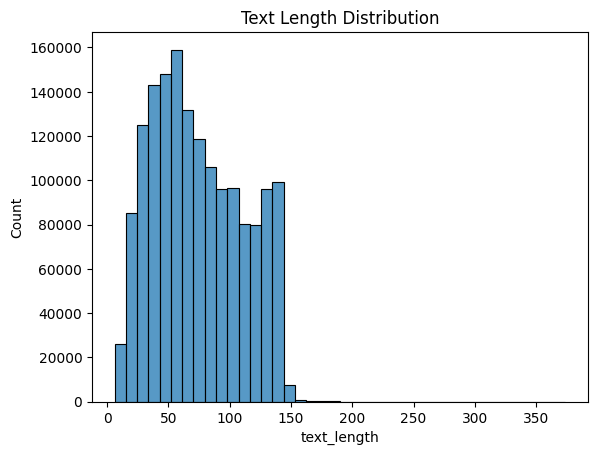

In [73]:
# Calculate and plot text lengths
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=40)
plt.title('Text Length Distribution')
plt.show()


Most of the texts are written in between 50-60 text-length. A Few text (<20,000) has text-length of 150 or above.

E:\Python 3.11\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


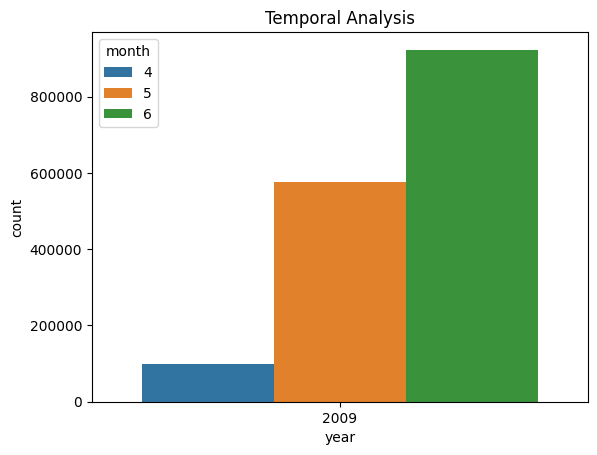

In [74]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Plot temporal analysis
sns.countplot(x='year', hue='month', data=df)
plt.title('Temporal Analysis')
plt.show()


Maximum data in the dataset belongs to 'June' month and the minimum data is from 'April' month.

# Text Preprocessing

In [75]:
df.drop(['target','date','text_length','year','month','day'],axis=1,inplace=True)

# Removal of URLs

In [76]:
import re

In [29]:
def remove_url(text):
    return re.sub(r'http?://\S+|www\.\S+','',text)

In [32]:
df['clean_text'] = df['text'].apply(lambda x: remove_url(x))
df.sample(frac=1).head()

,text,clean_text
673474,Ughh Hungry cuz Monet Lil Cornell Didnt Share ...,Ughh Hungry cuz Monet Lil Cornell Didnt Share ...
432136,"yes, i am tht bored","yes, i am tht bored"
1044884,Happy Sunny Friday to all you tweets,Happy Sunny Friday to all you tweets
1189421,Enjoying Summer,Enjoying Summer
155793,Watching soccer although isn't the finale I wa...,Watching soccer although isn't the finale I wa...


# Convert text to lowercase

In [33]:
df['clean_text'] = df['text'].str.lower()
df.sample(frac= 1).head()

,text,clean_text
1081736,@seanjay How did it go? 1 down and... how many?,@seanjay how did it go? 1 down and... how many?
1122718,"@LORI_SF yes, hows that one","@lori_sf yes, hows that one"
1131926,had fun jet skiing on the lake today! the guys...,had fun jet skiing on the lake today! the guys...
1220282,Is in pe sat on the grass in the blazing sun w...,is in pe sat on the grass in the blazing sun w...
853182,@cow_grrrl hey me too but I am going away for ...,@cow_grrrl hey me too but i am going away for ...


# Removal of Punctuation

In [34]:
import string

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def remove_punctuation(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('','',punctuations))

In [37]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuation(x))
df.sample(frac =1).head()

,text,clean_text
982803,@Moonchild66 LOL. The joy of youthful calm huh...,moonchild66 lol the joy of youthful calm huh ...
1194188,Listen Soundgarden's songs,listen soundgardens songs
534338,doesn't want to go back to 6th form tomorrow,doesnt want to go back to 6th form tomorrow
62558,@feanor1138 Watched race 2 blocks south of Was...,feanor1138 watched race 2 blocks south of wash...
1449261,ron white is great,ron white is great


# Removal of Stopwords

In [38]:
from nltk.corpus import stopwords

In [39]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [40]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

In [41]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))
df.sample(frac =1).head()

,text,clean_text
1226495,@DJ_DOTCOM OMG we HAVE to watch it ahhhhh...Lo...,djdotcom omg watch ahhhhhlol yup probs point a...
30969,"I'm in history, so bad",im history bad
287660,"hates going to the doctor, im only going becau...",hates going doctor im going
257367,@karensugarpants the hills are amazing! Season...,karensugarpants hills amazing season finally s...
393541,"I wish every browser supported border-radius, ...",wish every browser supported borderradius woul...


# Removal of Frequent Words

In [42]:
from collections import Counter

In [43]:
word_count = Counter()
for text in df['clean_text']:
    for word in text.split():
        word_count[word] +=1

word_count.most_common(10)

[('im', 177453),
 ('good', 89386),
 ('day', 82345),
 ('get', 81469),
 ('like', 77732),
 ('go', 72889),
 ('dont', 66915),
 ('today', 64584),
 ('going', 64072),
 ('love', 63454)]

In [45]:
frequent_words = set(word for (word,wc) in word_count.most_common(1))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in frequent_words])

In [46]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_freq_words(x))
df.head()

,text,clean_text
0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
2,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad cant see
4,@Kwesidei not the whole crew,kwesidei whole crew


# Removal of Rare Words

In [47]:
rare_words = set((word,wc) for (word,wc) in word_count.most_common()[:-10:-1])
rare_words

{('bigrun', 1),
 ('httpblipfm8bmta', 1),
 ('httptinyurlcomn65xjt', 1),
 ('oxhot', 1),
 ('royeveritt', 1),
 ('sparkscharity', 1),
 ('speakinguph4h', 1),
 ('thewdbcom', 1),
 ('thrillmesoon', 1)}

These words are used only once so we can remove them.

In [48]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in rare_words])

In [50]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_rare_words(x))
df.sample(frac=1).head()

,text,clean_text
511172,Its 3 am and I am wide awake,3 wide awake
222969,this nba season has been crazzzzyy..and like a...,nba season crazzzzyyand like anyonewanted see ...
785902,not eating noodles,eating noodles
931384,"Greek, GG, and OTH today all were great",greek gg oth today great
627134,"Almost home, more to do than not do. Bummer",almost home bummer


# Removal of Special Characters

In [51]:
import re
def remove_spl_chars(text):
    text= re.sub('[^a-zA-Z]',' ',text)
    text = re.sub('\s+',' ',text)
    return text

In [52]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_spl_chars(x))
df.sample(frac=1).head()

,text,clean_text
73008,Rainy Monday mornig &amp; back to work...,rainy monday mornig amp back work
315352,says i'm missing my Baby Boo so much. http://...,says missing baby boo much httpplurkcompxurlz
543928,@wsredneck Wish he was there,wsredneck wish
262235,needs a pick me up,needs pick
568651,'Transformers 2' is (are?) truly unwatchable. ...,transformers truly unwatchable even cgifriendl...
